# **Pattern Recognition Course (Fall 2024) - Assignment 3-part2**

**Due date**: 10th Dey 1403

**Dataset**: Reduced MINST


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

import heapq
from collections import Counter


# 1. Data Collection

In [4]:
x_train_set_path = "Tiny_MNIST_Dataset/Train_Data.csv"
x_test_set_path = "Tiny_MNIST_Dataset/Test_Data.csv"
y_train_set_path = "Tiny_MNIST_Dataset/Train_labels.csv"
y_test_set_path = "Tiny_MNIST_Dataset/Test_labels.csv"

x_train_set = np.genfromtxt(x_train_set_path, delimiter=",", skip_header=1)
x_test_set = np.genfromtxt(x_test_set_path, delimiter=",", skip_header=1)
y_train_set = np.genfromtxt(y_train_set_path, delimiter=",", skip_header=1)
y_test_set = np.genfromtxt(y_test_set_path, delimiter=",", skip_header=1)

# 2. Building KNN classifier
> Problem 3: Design and Implement a k-nearest neighbor classifier. Report the accuracy for 
K=1,3,5 and compare the results.

In [5]:
def knn_classification(k: int) -> np.ndarray:
    predicted_labels = np.zeros(x_test_set.shape[0])

    for i, x_test in enumerate(x_test_set):
        # compute the euclidean distances
        diff = x_test - x_train_set
        euc_dist = np.linalg.norm(diff, ord=2, axis=1)
        labeled_distances = np.column_stack((euc_dist, y_train_set)).tolist()

        # store euclidean distances in min heap -> closest point at the root
        # first element i.e euc_dist gets compared
        # heapify(labeled_distances)

        # KNN classification
        k_nearest = heapq.nsmallest(k, labeled_distances)
        k_nearest_labels = [neighbor[1] for neighbor in k_nearest]
        dominant_label = Counter(k_nearest_labels).most_common(1)
        predicted_labels[i] = dominant_label[0][0]

    return predicted_labels


# 3. Evaluation

## Auxiliary Tools

In [10]:
def accuracy_score(target_labels: np.ndarray, predicted_labels: np.ndarray):
    correct_predictions = np.sum(target_labels == predicted_labels)
    total_predictions = len(target_labels)
    accuracy = correct_predictions / total_predictions

    return accuracy


def visualize_accuracy(cm: np.ndarray, technique_title: str, accuracy: float):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the confusion matrix on the first subplot
    sns.heatmap(
        ax=ax1,  # Pass the subplot ax1 to sns.heatmap
        data=cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=range(0, 10),
        yticklabels=range(0, 10),
    )
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Actual")
    ax1.set_title(f"{technique_title} Confusion Matrix")

    # Calculate accuracy and error rate
    accuracy_percentage = accuracy * 100
    error_rate_percentage = (1 - accuracy) * 100

    # Create the pie chart on the second subplot
    labels = ["Accuracy", "Error Rate"]
    sizes = [accuracy_percentage, error_rate_percentage]
    colors = ["#66cdaa", "#f08080"]
    explode = (0.1, 0)

    ax2.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",  # Display percentage with one decimal place
        shadow=True,
        startangle=140,
    )
    ax2.set_title("Accuracy vs. Error Rate")

    plt.tight_layout()
    plt.show()


## 3.1: one run with k = 2

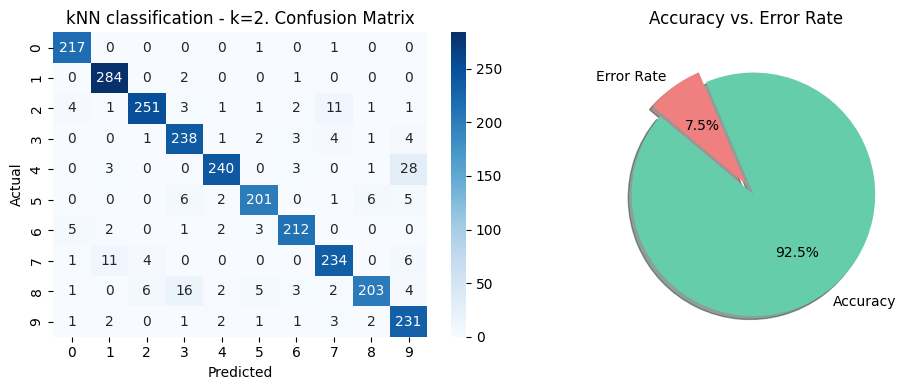

In [11]:
predicted_labels = knn_classification(k=2)

accuracy = accuracy_score(target_labels=y_test_set, predicted_labels=predicted_labels)
cm = confusion_matrix(
    y_true=y_test_set, y_pred=predicted_labels, labels=range(0, 10)
)
visualize_accuracy(
    cm=cm, technique_title="kNN classification - k=2.", accuracy=accuracy)

## 3.2 Multiple runs with k =1,3,5

In [12]:
knn_clf_accuracies = PrettyTable(
    ["k", "Accuracy %"]
)
for k in [1,3,5]:
    predicted_labels = knn_classification(k)
    accuracy = accuracy_score(target_labels=y_test_set, predicted_labels=predicted_labels)

    knn_clf_accuracies.add_row([k, f"{accuracy * 100:.2f}%"])

print(knn_clf_accuracies)

+---+------------+
| k | Accuracy % |
+---+------------+
| 1 |   92.48%   |
| 3 |   91.56%   |
| 5 |   91.08%   |
+---+------------+
